# **GRU Exercise**

## Import libraries

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import layers, Sequential, callbacks
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)/ LAB/Dataset/traffic.csv


In [40]:
df = pd.read_csv('/content/traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [41]:
df = df.drop('ID' , axis=1)

In [42]:
# Assuming your datetime column is in 'datetime' format
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month

In [43]:
df2=df.copy()

In [51]:
data = data[['Vehicles']]


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [52]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)


seq_length = 60
X, y = create_sequences(scaled_data, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))


## Feature Engineering (if needed)



## Data Exploration



## Exploratory Data Analysis


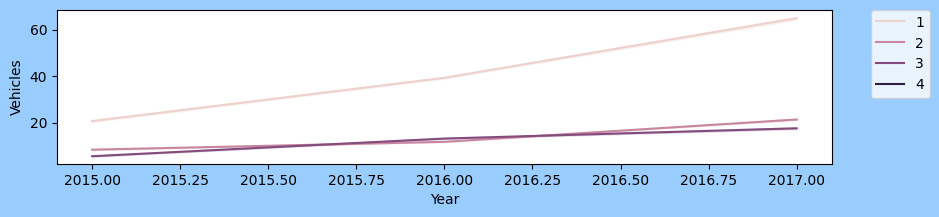

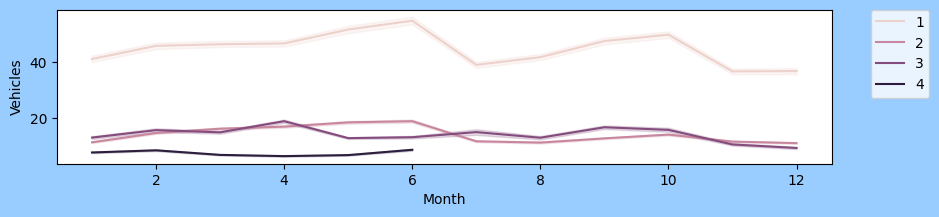

In [45]:
new_features = [ "Year","Month"]

for i in new_features:
    plt.figure(figsize=(10, 2),facecolor="#99ccff")
    ax=sns.lineplot(x=df[i],y="Vehicles",data=df2, hue="Junction")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


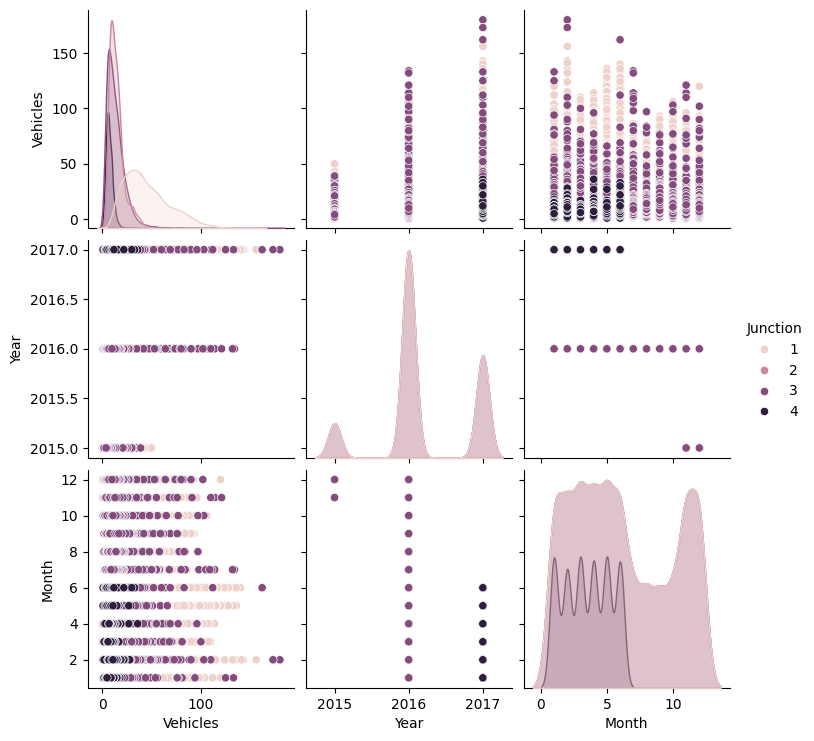

In [46]:
sns.pairplot(data=df2, hue="Junction")

In [48]:
X = df.drop('Vehicles',axis=1)
y=df.Vehicles

## split into train and test sets

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## Model Building



## Fitting The Model



In [54]:
# Build the GRU model
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 105s 83ms/step - loss: 0.0020 - val_loss: 8.5193e-04
Epoch 2/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 143s 84ms/step - loss: 6.9679e-04 - val_loss: 8.1136e-04
Epoch 3/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 106s 88ms/step - loss: 6.5614e-04 - val_loss: 7.8793e-04
Epoch 4/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 105s 87ms/step - loss: 6.1739e-04 - val_loss: 8.0849e-04
Epoch 5/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 139s 85ms/step - loss: 5.5656e-04 - val_loss: 7.6146e-04
Epoch 6/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 99s 83ms/step - loss: 5.9541e-04 - val_loss: 7.7812e-04
Epoch 7/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 142s 83ms/step - loss: 5.1740e-04 - val_loss: 8.1052e-04
Epoch 8/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 140s 82ms/step - loss: 5.1214e-04 - val_loss: 7.5520e-04
Epoch 9/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 140s 80ms/step - loss: 5.1768e-04 - val_loss: 7.4044e-04
Epoch 10/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 97s 81ms/step - loss: 4.9195e-04 - val_loss: 7.4865e-04


## Make preductuion and evaluatuin matrix.

In [55]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


## Visualize the result

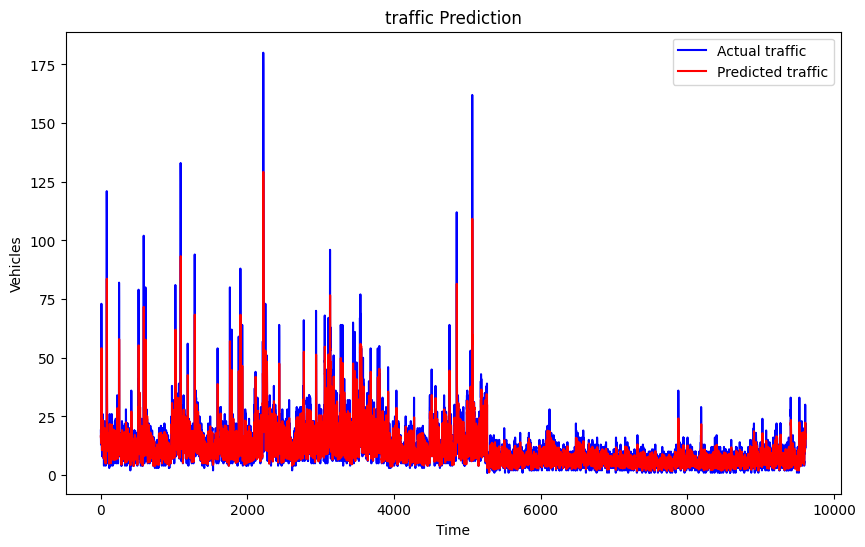

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual traffic')
plt.plot(predicted_stock_price, color='red', label='Predicted traffic')
plt.title('traffic Prediction')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.legend()
plt.show()

# **Well done** :)